In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv('/home/ibi/Documents/GitHub/DAP301m-code/Lab_1/lab1_kc_house_data.csv')

### Question 1: Display the data types of each column using the function dtypes

In [3]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Question 2: Drop the columns 'id' and 'Unnamed: 0', then describe the data

In [4]:
data_cleaned = data.drop(columns=['id'], axis=1)
data_cleaned.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Question 3: Count the number of unique floor values and convert to DataFrame

In [5]:
data['floors'].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Question 4: Boxplot of price for houses with or without waterfront view

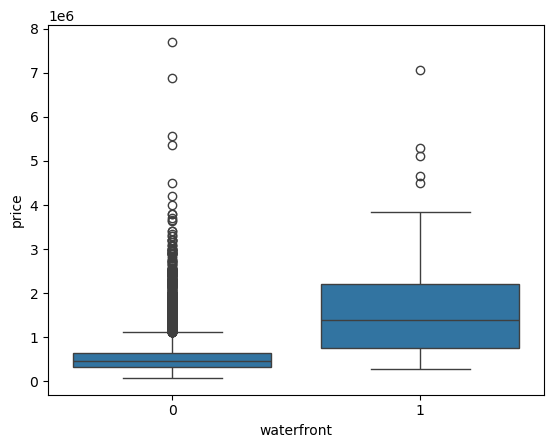

In [6]:
sns.boxplot(x='waterfront', y='price', data=data)
plt.show()

### Question 5: Regression plot of price vs sqft_above

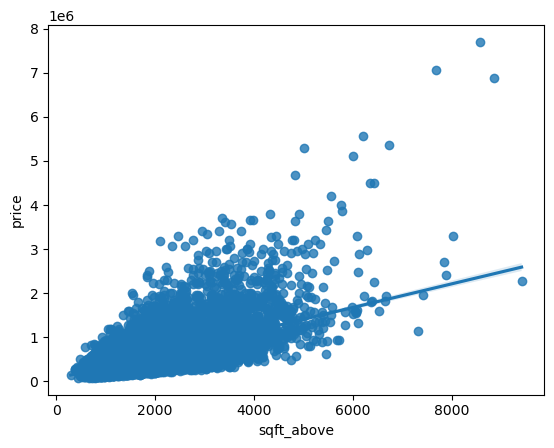

In [7]:
sns.regplot(x='sqft_above', y='price', data=data)
plt.show()

### Question 6: Linear regression model for 'price' using 'sqft_living' and calculate R^2

In [8]:
X = data[['sqft_living']]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.49406905389089006

### Question 7: Linear regression with multiple features and calculate R^2

In [9]:
features = ['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']
X = data[features]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_multiple_features = r2_score(y_test, y_pred)
r2_multiple_features

0.6614781405487568

### Question 8: Create a list of tuples for the pipeline

In [10]:
pipeline_steps = [
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
]

### Question 9: Use the pipeline to predict and calculate R^2

In [11]:
pipeline = Pipeline(pipeline_steps)
pipeline.fit(X_train, y_train)
y_pred_pipeline = pipeline.predict(X_test)
r2_pipeline = r2_score(y_test, y_pred_pipeline)
r2_pipeline

0.7094627970318972

### Question 10: Ridge regression with regularization parameter 0.1 and calculate R^2

In [12]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_ridge

0.6614734596866669

### Question 11: Polynomial transform and Ridge regression with regularization 0.1

In [13]:
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_transformer.fit_transform(X_train)
X_test_poly = poly_transformer.transform(X_test)
ridge_poly_model = Ridge(alpha=0.1)
ridge_poly_model.fit(X_train_poly, y_train)
y_pred_ridge_poly = ridge_poly_model.predict(X_test_poly)
r2_ridge_poly = r2_score(y_test, y_pred_ridge_poly)
r2_ridge_poly

0.7003486880154586